## Preprocessing

In [ ]:
# import important libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Set the maximum column width to None, so that columns can expand to fit their content
pd.set_option('display.max_colwidth', None) 

# Set the maximum number of displayed columns to None, allowing all columns to be shown without truncation
pd.set_option('display.max_columns', None)


df_20_21 = pd.read_csv('diemthi_thpt_2020_2024/diem_thi_2020_2021.csv')
df_22 = pd.read_csv('diemthi_thpt_2020_2024/diem_thi_thpt_2022.csv')
df_23 = pd.read_csv('diemthi_thpt_2020_2024/diem_thi_thpt_2023.csv')
df_24 = pd.read_csv('diemthi_thpt_2020_2024/diem_thi_thpt_2024.csv')

df_20_21.sort_values(by ='SBD', ascending = True).head() # sort the values of df_20_21 by the Student_ID and assceding take the first 5 value
df_22.sort_values(by ='sbd', ascending = True).head() # sort the values of df_22 by the Student_ID and assceding take the first 5 value
df_23.sort_values(by ='sbd', ascending = True).head() # sort the values of df_23 by the Student_ID and assceding take the first 5 value
df_24.sort_values(by ='sbd', ascending = True).head() # sort the values of df_24 by the Student_ID and assceding take the first 5 value


df_20_21["ForeignCode"] = 'None'
df_22["ForeignCode"] = 'None'
df_22["Year"] = "2022"
df_23["Year"] = "2023"
df_24["Year"] = "2024"


df_20_21 = df_20_21[["SBD","Toán","Văn","Ngoại Ngữ","Lý","Hoá","Sinh","Lịch Sử","Địa Lý","GDCD", "ForeignCode","Year"]]

df_20_21.columns = ["Student_ID", "Math", "Literature", "Foreign Language", "Physics", "Chemistry", "Biology", "History", "Geography", "Civic Education", "ForeignCode", "Year"]

df_22.columns = ["Student_ID", "Math", "Literature", "Foreign Language", "Physics", "Chemistry", "Biology", "History", "Geography", "Civic Education", "ForeignCode", "Year"]

df_23.columns = ["Student_ID", "Math", "Literature", "Foreign Language", "Physics", "Chemistry", "Biology", "History", "Geography", "Civic Education", "ForeignCode", "Year"]

df_24.columns = ["Student_ID", "Math", "Literature", "Foreign Language", "Physics", "Chemistry", "Biology", "History", "Geography", "Civic Education", "ForeignCode", "Year"]


/var/folders/7x/1c_g2v5s46gd3rpq1b_zrd1r0000gn/T/ipykernel_63176/994523686.py:14: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_20_21 = pd.read_csv('diemthi_thpt_2020_2024/diem_thi_2020_2021.csv')


In [3]:
df_all_data =(
    pd.concat([df_20_21, df_22, df_23, df_24], ignore_index=True))
df_all_data.info()
# Read the CSV file into a dataframe 'df_province'
df_province = pd.read_csv('diemthi_thpt_2020_2024/diem_thi_2020_2021.csv')

# Create a new dataframe 'df_code' containing only the 'code' and 'province' columns from 'df_province', dropping duplicate rows
df_code = df_province[['code', 'province']].drop_duplicates()

# Convert the 'code' column in 'df_code' to string type
df_code['code'] = df_code['code'].astype(str)

# Sort the 'df_code' dataframe by the 'code' column in ascending order
df_code.sort_values(by='code', ascending=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936983 entries, 0 to 4936982
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Student_ID        int64  
 1   Math              float64
 2   Literature        float64
 3   Foreign Language  float64
 4   Physics           float64
 5   Chemistry         float64
 6   Biology           float64
 7   History           float64
 8   Geography         float64
 9   Civic Education   float64
 10  ForeignCode       object 
 11  Year              object 
dtypes: float64(9), int64(1), object(2)
memory usage: 452.0+ MB


/var/folders/7x/1c_g2v5s46gd3rpq1b_zrd1r0000gn/T/ipykernel_63176/3893372647.py:5: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_province = pd.read_csv('diemthi_thpt_2020_2024/diem_thi_2020_2021.csv')


,code,province
20857,1,Hà Nội
348763,10,Lạng Sơn
337052,11,Bắc Kạn
41516,12,Thái Nguyên
4830,13,Yên Bái
...,...,...
37962,63,Đăk Nông
356520,64,Hậu Giang
715703,7,Lai Châu
37961,8,Lào Cai


In [4]:
# create a function to add code province
# Define a function 'provide_code' that takes an input 'x' and returns a specific portion of 'x' based on its length
def province_code(x):
    # If the string representation of 'x' has a length of 7, return the first character
    if len(str(x)) == 7:
        return str(x)[0]
    # Otherwise, return the first two characters of the string representation of 'x'
    return str(x)[:2]

# Apply the 'province_code' function to the 'Student_ID' column of 'df_all_data' and create a new column 'province_code' with the results
df_all_data["province code"] = df_all_data['Student_ID'].apply(province_code)

In [5]:
# Merge 'df_all_data' with 'df_code' on the 'province_code' column from 'df_all_data' and the 'code' column from 'df_code'
# Perform a left join to ensure all rows from 'df_all_data' are included in the resulting dataframe 'df_data_map'
df_data_map = (
    pd.merge(df_all_data, df_code, left_on='province code', right_on='code', how='left')
)

# Count the number of non-NA/null entries for each column in 'df_data_map'
df_data_map.count()


Student_ID          4936983
Math                4875444
Literature          4870458
Foreign Language    4304415
Physics             1636638
Chemistry           1644189
Biology             1620819
History             3252369
Geography           3227958
Civic Education     2718405
ForeignCode         4647020
Year                4936983
province code       4936983
code                4936983
province            4936983
dtype: int64

## Predict next year of difficulity

In [12]:
import pandas as pd
import numpy as np

df_long = df_data_map.melt(
    id_vars=['Student_ID', 'Year', 'province'],
    value_vars=['Math','Literature','Foreign Language','Physics',
                'Chemistry','Biology','History','Geography','Civic Education'],
    var_name='Subject',
    value_name='Score'
)

# Bỏ NaN
df_long = df_long.dropna(subset=['Score'])
df_long

,Student_ID,Year,province,Subject,Score
0,18014547,2020,Bắc Giang,Math,6.40
1,18014530,2020,Bắc Giang,Math,7.60
2,18014521,2020,Bắc Giang,Math,4.80
3,18014517,2020,Bắc Giang,Math,8.00
4,18014523,2020,Bắc Giang,Math,8.20
...,...,...,...,...,...
44432840,64007280,2024,Hậu Giang,Civic Education,6.00
44432842,64007282,2024,Hậu Giang,Civic Education,7.50
44432843,64007283,2024,Hậu Giang,Civic Education,7.75
44432845,64007285,2024,Hậu Giang,Civic Education,8.75


Aggregated (Year,Subject) rows: 45
Training rows (Year t -> label Year t+1): (36, 19)
Train/Test sizes: (27, 16) (9, 16)
RF R2: 0.47183356374630314
RF MAE: 0.9287437306673358
RF RMSE: 1.3559955622341455
XGB R2: 0.33992059654450135
XGB MAE: 1.2380410300374334
Saved model and scalers.
        feature  importance
1          mean    0.474716
2           std    0.314848
5   pct_above_8    0.097276
15       hist_9    0.037675
9        hist_3    0.029798
6        hist_0    0.028768
12       hist_6    0.007413
0         count    0.004522
4   pct_below_3    0.003660
11       hist_5    0.000583
3          skew    0.000553
7        hist_1    0.000104
13       hist_7    0.000041
14       hist_8    0.000029
10       hist_4    0.000013
8        hist_2    0.000000


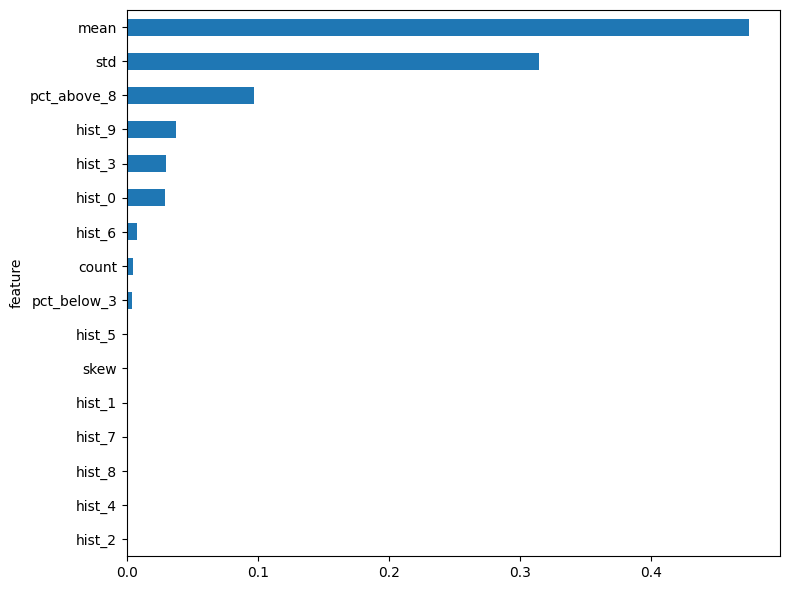

             Subject  Year  label_next_year  pred_difficulty_next
3            Biology  2023         4.894855              5.718781
7          Chemistry  2023         4.474666              4.470203
11   Civic Education  2023         0.361156              2.012608
15  Foreign Language  2023         7.586911              8.207594
19         Geography  2023         2.796488              4.364963
23           History  2023         4.433240              7.196823
27        Literature  2023         2.899010              4.422810
31              Math  2023         5.059845              7.173001
35           Physics  2023         4.603333              4.530500


In [16]:
# HƯỚNG A: predict next-year difficulty from current-year distribution
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib
import os

# ---------- CONFIG ----------
CSV_PATH = "scores.csv"   # <-- đổi đường dẫn file của bạn
ID_COL = "Student_ID"
YEAR_COL = "Year"
PROVINCE_COL = "province"    # (không cần thiết cho Hướng A nhưng giữ nguyên)
SUBJECTS = ["Math","Literature","Foreign Language","Physics","Chemistry",
            "Biology","History","Geography","Civic Education"]
W1, W2, W3 = 0.6, 0.3, 0.1  # weights cho công thức difficulty
BIN_COUNT = 10
MIN_COUNT_FOR_GROUP = 100  # lọc nhóm quá nhỏ nếu muốn
# ---------------------------

# ---------- 1. Read and long format ----------

# melt to long format (1 row = 1 student × 1 subject)
df_long = df_data_map.melt(
    id_vars=[ID_COL, YEAR_COL, PROVINCE_COL],
    value_vars=SUBJECTS,
    var_name="Subject",
    value_name="Score"
)

# clean
df_long = df_long.dropna(subset=['Score'])
df_long['Score'] = pd.to_numeric(df_long['Score'], errors='coerce')
df_long = df_long.dropna(subset=['Score'])

# ---------- 2. Aggregate per (Year, Subject): distribution features ----------
def calc_stats(arr):
    a = np.asarray(arr)
    out = {
        'mean': float(a.mean()) if len(a)>0 else np.nan,
        'std': float(a.std(ddof=1)) if len(a)>1 else 0.0,
        'skew': float(skew(a)) if len(a)>2 else 0.0,
        'count': int(len(a)),
        'min': float(a.min()) if len(a)>0 else np.nan,
        'max': float(a.max()) if len(a)>0 else np.nan
    }
    # histogram bins 0..10 equally spaced (0-1,1-2,...,9-10)
    bins = np.linspace(0, 10, BIN_COUNT+1)
    hist, _ = np.histogram(a, bins=bins)
    hist_pct = (hist / out['count']).tolist() if out['count']>0 else [0]*BIN_COUNT
    # some threshold percentages
    out['pct_below_3'] = float(np.mean(a < 3.0)) if out['count']>0 else 0.0
    out['pct_above_8'] = float(np.mean(a >= 8.0)) if out['count']>0 else 0.0
    # attach hist bins
    for i in range(BIN_COUNT):
        out[f'hist_{i}'] = hist_pct[i]
    return out

# groupby (Year, Subject)
groups = []
grouped = df_long.groupby([YEAR_COL, 'Subject'])['Score']
for name, grp in grouped:
    year, subject = name
    arr = grp.values
    stats = calc_stats(arr)
    stats[YEAR_COL] = int(year)
    stats['Subject'] = subject
    groups.append(stats)

dist_df = pd.DataFrame(groups)
# optional: filter low-count subjects/years
dist_df = dist_df[dist_df['count'] >= MIN_COUNT_FOR_GROUP].reset_index(drop=True)
print("Aggregated (Year,Subject) rows:", dist_df.shape[0])

# ---------- 3. Create label: difficulty for NEXT YEAR ----------
# First compute difficulty for each (Year,Subject) using chosen formula
dist_df['difficulty_raw'] = (
    W1 * (10.0 - dist_df['mean']) +
    W2 * dist_df['std'] +
    W3 * dist_df['skew'].abs()
)
# Normalize difficulty_raw to 0-10 scale
scaler_label = MinMaxScaler(feature_range=(0,10))
dist_df['difficulty_norm'] = scaler_label.fit_transform(dist_df[['difficulty_raw']])

# Now create dataset where features are Year t and label is difficulty_norm of Year t+1 (same Subject)
dist_df = dist_df.sort_values([ 'Subject', YEAR_COL ])
dist_df['year_plus1'] = dist_df[YEAR_COL] + 1

# prepare a lookup for label: (Year,Subject) -> difficulty_norm
label_map = dist_df.set_index([YEAR_COL, 'Subject'])['difficulty_norm'].to_dict()

# Build rows where label exists for next year
rows = []
for idx, row in dist_df.iterrows():
    y = row[YEAR_COL]
    subj = row['Subject']
    target_key = (y+1, subj)
    if target_key in label_map:
        # features from current row
        feat = {
            'Year': y,
            'Subject': subj,
            'count': row['count'],
            'mean': row['mean'],
            'std': row['std'],
            'skew': row['skew'],
            'pct_below_3': row['pct_below_3'],
            'pct_above_8': row['pct_above_8'],
        }
        # add hist bins
        for i in range(BIN_COUNT):
            feat[f'hist_{i}'] = row[f'hist_{i}']
        feat['label_next_year'] = label_map[target_key]
        rows.append(feat)

ts_df = pd.DataFrame(rows)
print("Training rows (Year t -> label Year t+1):", ts_df.shape)

# ---------- 4. Features / target ----------
feature_cols = ['count','mean','std','skew','pct_below_3','pct_above_8'] + [f'hist_{i}' for i in range(BIN_COUNT)]
X = ts_df[feature_cols].fillna(0).values
y = ts_df['label_next_year'].values

# It's important: we DO NOT remove mean/std/skew here if you want to be stricter (you may want only hist bins).
# Option: comment out mean/std/skew to force model learn from histogram only:
# feature_cols = ['count','pct_below_3','pct_above_8'] + [f'hist_{i}' for i in range(BIN_COUNT)]
# X = ts_df[feature_cols].fillna(0).values

# scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------- 5. Time-aware split: train on earlier years, test on latest year ----------
years = sorted(ts_df['Year'].unique())
if len(years) >= 2:
    train_mask = ts_df['Year'] < years[-1]    # all years before last
    test_mask = ts_df['Year'] == years[-1]
    X_train, X_test = X_scaled[train_mask], X_scaled[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]
else:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train/Test sizes:", X_train.shape, X_test.shape)

# ---------- 6. Train model ----------
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("RF R2:", r2_score(y_test, y_pred))
print("RF MAE:", mean_absolute_error(y_test, y_pred))
print("RF RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Try XGBoost if available
best_model = rf
try:
    import xgboost as xgb
    xg = xgb.XGBRegressor(n_estimators=200, tree_method='hist', random_state=42, n_jobs=8)
    xg.fit(X_train, y_train)
    y_pred_xg = xg.predict(X_test)
    print("XGB R2:", r2_score(y_test, y_pred_xg))
    print("XGB MAE:", mean_absolute_error(y_test, y_pred_xg))
    best_model = xg
except Exception as e:
    print("XGBoost not used:", e)

# ---------- 7. Save model + scalers ----------
os.makedirs("models", exist_ok=True)
joblib.dump(best_model, "models/difficulty_a_model.pkl")
joblib.dump(scaler, "models/feature_scaler.pkl")
joblib.dump(scaler_label, "models/label_scaler.pkl")
print("Saved model and scalers.")

# ---------- 8. Quick analysis: show feature importances ----------
try:
    import matplotlib.pyplot as plt
    imp = best_model.feature_importances_
    feat_imp = pd.DataFrame({'feature': feature_cols, 'importance': imp}).sort_values('importance', ascending=False)
    print(feat_imp.head(20))
    feat_imp.plot.barh(x='feature', y='importance', legend=False, figsize=(8,6))
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Plot failed:", e)

# ---------- 9. Example: predict next-year difficulty for each subject in the latest year ----------
latest_year = years[-1]
pred_rows = ts_df[ts_df['Year'] == latest_year]  # these actually have label = year+1 if exists; if not, we can predict
if pred_rows.shape[0] > 0:
    X_pred = scaler.transform(pred_rows[feature_cols].fillna(0).values)
    y_pred_next = best_model.predict(X_pred)
    pred_rows = pred_rows.copy()
    pred_rows['pred_difficulty_next'] = y_pred_next
    print(pred_rows[['Subject','Year','label_next_year','pred_difficulty_next']])
